### ML for Red and white Wine

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import red an white

In [27]:

red_wine = pd.read_csv("winequality-red.csv", sep =";")

#C:\Users\cumdi\Desktop\Bootcamp Visual Studio\Modul 1\Project_02\windedata\winequality-red.csv
# SEP-Argument seperiert die Daten, hier ist es  mit einem Semicolon

white_wine = pd.read_csv("winequality-white.csv", sep =";")

In [28]:
# create new column
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform into categorical type
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high']) 

In [29]:
# create new column
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# transform into categorical type
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [30]:
white_wine.columns = white_wine.columns.str.replace(' ', '_')
red_wine.columns = red_wine.columns.str.replace( ' ','_') #replace Leerzeichen mit Unterstrich
red_wine.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low


# Encoding Kategories to Numbers with Ordinal Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


oe = OrdinalEncoder(categories=[["low", "medium","high"]], dtype=int) # this is how you can define the label order
red_wine['quality_label'] = oe.fit_transform(red_wine[['quality_label']])
red_wine.tail(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


## Red Wine Data split

In [32]:
from sklearn.model_selection import train_test_split

X  = red_wine.drop(columns=['quality','quality_label'])
y = red_wine['quality_label']

print("original:", red_wine.shape, "\nX:", X.shape, "\ny:", y.shape)


original: (1599, 13) 
X: (1599, 11) 
y: (1599,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train, X_test)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free_sulfur_dioxide  

## Random Forest Red wine with the Best hyper parameter

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF_pg = RandomForestClassifier(random_state=40, n_estimators= 100,max_depth=30,min_samples_split=2,max_features=None,)
RF_pg.fit(X_train, y_train)

#Results
#RF_pg = RandomForestClassifier(random_state=40, n_estimators= 3,max_depth=3,min_samples_split=3,)
#Accuracy Score: 0.7125

#params:  {'n_estimators': 100, 'min_samples_split': 2, 'max_features': None, 'max_depth': 30}

RandomForestClassifier(max_depth=30, max_features=None, random_state=40)

In [47]:
pred_redwine = RF_pg.predict(X_test)
pred_redwine

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [52]:
from sklearn.metrics import accuracy_score 
acc_redwine = accuracy_score(y_test, pred_redwine)
print("Accuracy Score:" , acc_redwine)

Accuracy Score: 0.78125


In [56]:
from sklearn.metrics import confusion_matrix
cm_redwine = confusion_matrix(y_test,pred_redwine)
cm_redwine

array([[111,  30,   0],
       [ 34, 139,   1],
       [  0,   5,   0]], dtype=int64)

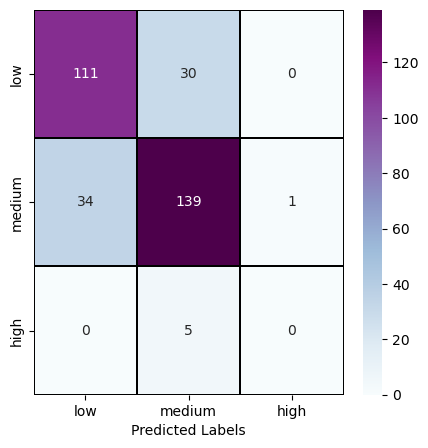

In [59]:
plt.figure(figsize=(5, 5))

# Plot der Heatmap mit einem "BuPu" colormap
ax = sns.heatmap(cm_redwine, annot=True, cmap="BuPu", linewidths=0.2, linecolor='black', fmt="d", 
            xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])


plt.xlabel("Predicted Labels")
plt.show()

In [62]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

report = classification_report(y_test, pred_redwine)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       141
           1       0.80      0.80      0.80       174
           2       0.00      0.00      0.00         5

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.53       320
weighted avg       0.77      0.78      0.78       320

